<a href="https://colab.research.google.com/github/MasiboBrian/AirBNB-Price-Prediction/blob/master/Knowledge_graph_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old Student recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... amod
Student ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


In [ ]:
from google.colab import files
up = files.upload()

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:

# import wikipedia sentences
path = '/content/drive/MyDrive/wiki_sentences_v2.csv'
path1 = '/content/drive/MyDrive/Train.csv'
candidate_sentences = pd.read_csv(path)
candidate_sentences.shape

(4318, 1)

In [ ]:
knw = pd.read_csv(path1)
knw.shape

(2025, 5)

In [ ]:
knw.head

<bound method NDFrame.head of         id      label sublabel   country  \
0       96   accident      NaN     china   
1       97   accident      NaN     china   
2       98   accident      NaN     china   
3      100   accident      NaN     china   
4      102   accident      NaN     china   
...    ...        ...      ...       ...   
2020  2099  Terrorism      NaN  New York   
2021  2100  Terrorism      NaN  New York   
2022  2102  Terrorism      NaN  New York   
2023  2103  Terrorism      NaN  New York   
2024  2108  Terrorism      NaN  New York   

                                                                                                                                              text  
0     'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER  
1                                               Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693

In [ ]:
candidate_sentences.head()

,sentence
0,"confused and frustrated, connie decides to leave on her own."
1,"later, a woman’s scream is heard in the distance."
2,christian is then paralyzed by an elder.
3,the temple is set on fire.
4,"outside, the cult wails with him."


In [ ]:
candidate_sentences['sentence'].sample(5)

1749      some bollywood films have been widely appreciated in china, japan, and south korea.
224          the film was night key, a science fiction crime thriller starring boris karloff.
2643                                  kogama currently has over one million registered users.
3989             there are a lot of historical inaccuracies that just don't have to be there.
4211    his methods seem harsh, including grueling early morning workouts and short haircuts.
Name: sentence, dtype: object

In [ ]:
#check the subject and object of one of these sentences.
#Ideally, there should be one subject and one object in the sentence:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)
#There is only one subject (‘process’) and only one object (‘standard’)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################

  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text

      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text

      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      ## chunk 5
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("the film had 200 patents")


['film', '200  patents']

In [ ]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 4318/4318 [00:54<00:00, 79.42it/s]


In [ ]:
entity_pairs

[['connie', 'own'],
 ['later  woman', 'distance'],
 ['christian', 'then  elder'],
 ['temple', 'fire'],
 ['outside  cult', 'him'],
 ['it', 'religious  awakening'],
 ['c. mackenzie', 'craig cast'],
 ['later craig di francia', 'action cast'],
 ['sebastian  maniscalco', 'later paul ben cast'],
 ['we', 'just  film'],
 ['we', 'tests'],
 ['m global', 'international sales rights'],
 ['robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['', 'military  arrest'],
 ['train', 'vuk'],
 ['telepath', 'gallio'],
 ['singer', 'men'],
 ['last  which', 'penn'],
 ['jessica chastain', 'same  character'],
 ['mauro fiore', 'cinematographer'],
 ['filming', 'october'],
 ['soundtrack', 'digitally  june'],
 ['album', 'digitally  august'],
 ['film', 'studios motion pictures'],
 ['it', '$  103.7'],
 ['', ''],
 ['it', 'executive producer yoshimitsu banno'],
 ['vivienne graham', 'former employee dr'],
 ['emma monster which', 'several

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1", None, pattern)

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [ ]:
get_relation("John finished the task")

'finished'

In [ ]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]


100%|██████████| 4318/4318 [00:50<00:00, 84.75it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

is               370
was              297
released on       87
include           73
were              71
are               71
released          40
's                38
composed by       35
have              31
has               31
became            31
become            29
released in       27
included          26
produced          22
called            22
made              20
had               20
considered        20
be                18
been              18
used              17
scheduled         17
directed by       16
stars             16
written by        15
produced by       14
wrote             14
hired             14
set               14
went              13
introduced in     13
received          13
wanted            12
began in          11
won               11
began             11
features          10
sold              10
gave              10
known as           9
directed           9
opened             9
used in            9
shot in            9
includes           9
gives        

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

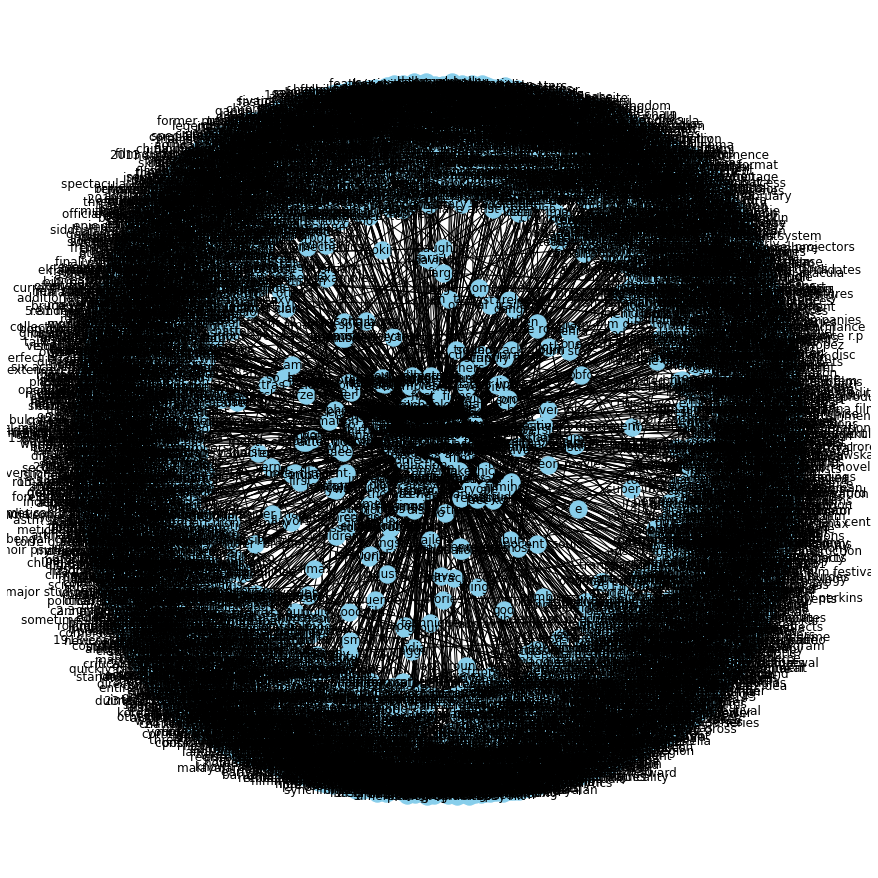

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

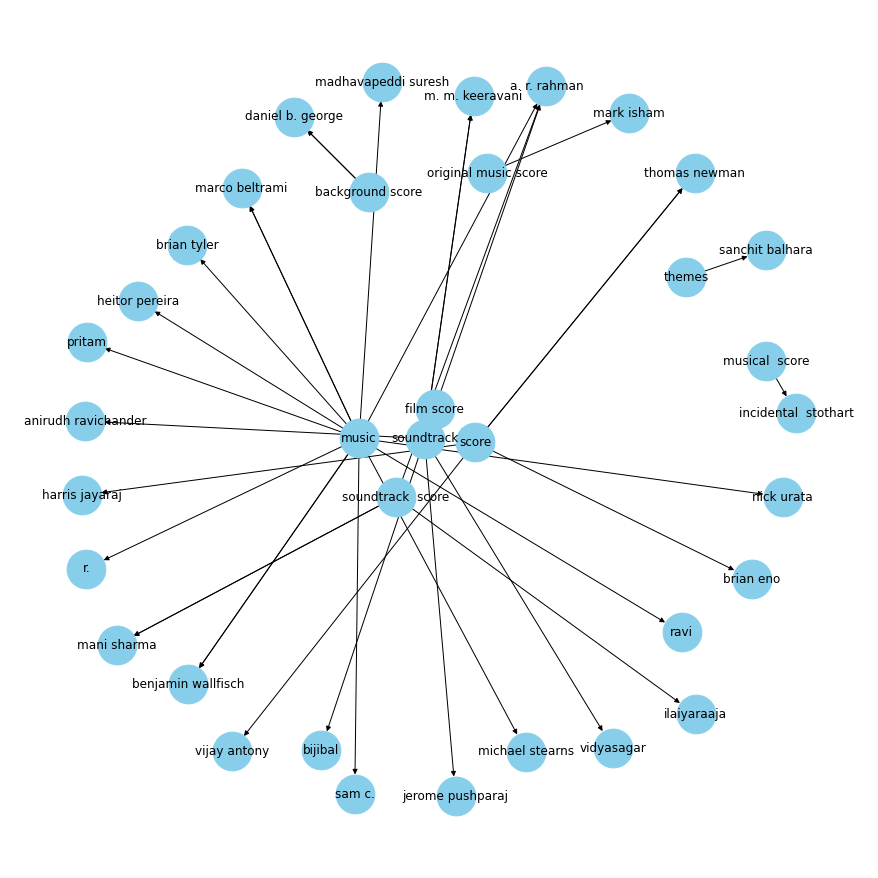

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

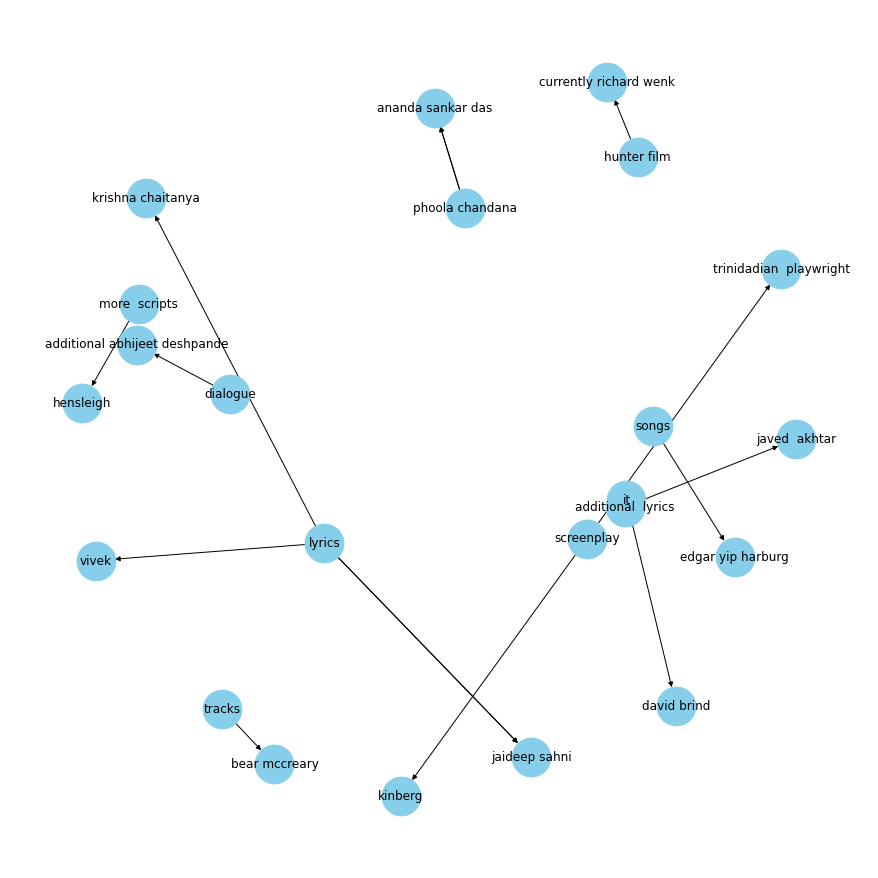

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
relations

['decides',
 'heard in',
 'paralyzed by',
 'set on',
 'wails with',
 "'s",
 'joined',
 'revealed',
 'revealed as',
 'tried',
 'went through',
 'circling',
 'supervised',
 'features',
 'is',
 'injures',
 'forces',
 'attacked by',
 'portrays',
 'return',
 'stand',
 'considered for',
 'served as',
 'completed on',
 'released',
 'released',
 'distributed by',
 'ended',
 'chandler',
 'dedicated to executive',
 'approach former',
 'frees',
 'disowns',
 'appears as',
 'credited as',
 'stated',
 'empathizing with',
 'was',
 'contributed to',
 'took',
 'changed',
 'became',
 'look like big',
 'perform',
 'managed',
 'released on',
 'written by',
 'conducted by',
 'released',
 'released',
 'scheduled',
 'offered in',
 'includes',
 'include limited',
 'are ready',
 'was',
 'tend',
 'include',
 'prevalent in typical',
 'is',
 'are',
 'had many',
 'supervises',
 'oversee',
 'credited',
 'start in',
 'started as',
 'attended',
 'use different',
 'take',
 'equipped with sound',
 'designed for',
 'coo

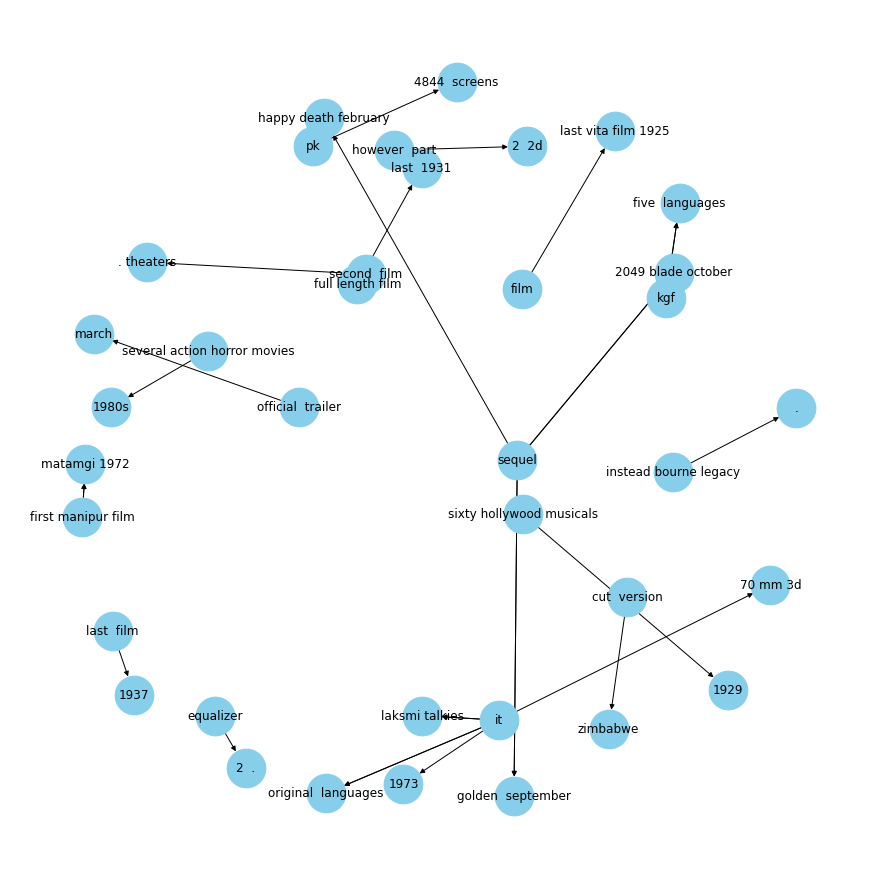

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="released in"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()